In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from collections import Counter
from tqdm.notebook import tqdm

In [2]:
# Set display options min rows and columns and max columns
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_columns', 100)

# Load

In [ ]:
# Load data
df = pd.DataFrame()
for i in tqdm(range(4)):
    df = pd.concat([df, pd.read_excel(f'data/Credit Risk Project - Data {i+1}.xlsx')], ignore_index=True)

In [4]:
print(df.shape)
df.head()

(400181, 21)


,LOAN_AMOUNT_BAND,QUOTE_DECISION,QUOTE_DECLINE_REASON,APPLICATION_DECISION,APPLICATION_REFER_REASON,APPLICATION_DECLINE_REASON,LOAN_PURPOSE,RESIDENTIAL_STATUS,CHANNEL,UNSECURED_DEBT,DEBT_TO_INCOME,ANNUAL_INCOME,DISPOSABLE_INCOME,CREDIT_GRADE,DEFAULTED,QUOTE_REQUEST_VOLUME,APPLICATION_VOLUME,PAIDOUT_VOLUME,LOANMOUNT,APR,PREDICTED_LOSS
0,5000-7499,DECLINED,CREDIT,NaN,NaN,NaN,OTHER,HOMEOWNER,PCW 1,a) <10k,a) <5,c)20-29k,d)£500-999,1,N,1269,0,0,7114850,NaN,0.016734
1,15001-20000,DECLINED,CREDIT,NaN,NaN,NaN,VEHICLE PURCHASE,HOMEOWNER,PCW 1,d)>30k,c)10-14,d)30-49k,e)<£500,1,N,1338,0,0,25432956,NaN,0.009371
2,7500-15000,APPROVED,NaN,NaN,NaN,NaN,VEHICLE PURCHASE,HOMEOWNER,PCW 1,a) <10k,a) <5,c)20-29k,e)<£500,3,N,4859,0,0,52791612,0.116502,0.025211
3,3000-4999,APPROVED,NaN,NaN,NaN,NaN,DEBT CONSOLIDATION,RENTER,PCW 1,b)10-19k,b)5-9,d)30-49k,d)£500-999,3,N,429,0,0,1551050,0.234095,0.067529
4,5000-7499,DECLINED,CREDIT,NaN,NaN,NaN,VEHICLE PURCHASE,RENTER,PCW 1,a) <10k,a) <5,c)20-29k,d)£500-999,6,N,57233,0,0,336403319,NaN,NaN


# Exploration and Simple Metrics

In [5]:
df.describe()

,CREDIT_GRADE,QUOTE_REQUEST_VOLUME,APPLICATION_VOLUME,PAIDOUT_VOLUME,LOANMOUNT,APR,PREDICTED_LOSS
count,400181.000000,400181.000000,400181.000000,400181.000000,4.001810e+05,117433.000000,276005.000000
mean,3.495933,178.953079,0.300182,0.130768,1.442468e+06,0.222574,0.050716
std,1.658790,1437.459077,1.662779,1.138587,1.032976e+07,0.201031,0.027795
min,1.000000,1.000000,0.000000,0.000000,1.000000e+03,0.052500,0.001365
25%,2.000000,2.000000,0.000000,0.000000,1.250000e+04,0.141414,0.025211
50%,4.000000,11.000000,0.000000,0.000000,6.250000e+04,0.175386,0.045020
75%,5.000000,59.000000,0.000000,0.000000,4.022830e+05,0.226830,0.074404
max,6.000000,207839.000000,151.000000,117.000000,1.389987e+09,1.248750,0.107149


In [6]:
# For all columns not in df.describe() we will check the unique values using Counter
for col in df.columns:
    if col not in df.describe().columns:
        print(col)
        display(Counter(df[col]))

LOAN_AMOUNT_BAND


Counter({'5000-7499': 72160,
         '15001-20000': 43216,
         '7500-15000': 81308,
         '3000-4999': 63638,
         '1000-1999': 51379,
         '2000-2999': 52931,
         '20001-25000': 35547,
         '25000+': 2})

QUOTE_DECISION


Counter({'DECLINED': 327012, 'APPROVED': 73169})

QUOTE_DECLINE_REASON


Counter({'CREDIT': 71107,
         nan: 73169,
         'AFFORDABILITY': 30920,
         'OTHER': 95348,
         'ELIGIBILITY': 129637})

APPLICATION_DECISION


Counter({nan: 356338, 'REFERRED': 20512, 'APPROVED': 12481, 'DECLINED': 10850})

APPLICATION_REFER_REASON


Counter({nan: 379669,
         'OTHER': 5068,
         'INCOME VERIFICATION': 6176,
         'FRAUD': 4895,
         'ID&V': 4373})

APPLICATION_DECLINE_REASON


Counter({nan: 389331,
         'ID&V': 184,
         'CHANGED DETAILS': 4020,
         'FRAUD': 1632,
         'INCOME VERIFICATION': 2269,
         'OTHER': 2109,
         'MULTIPLE APPS': 636})

LOAN_PURPOSE


Counter({'OTHER': 90570,
         'VEHICLE PURCHASE': 100590,
         'DEBT CONSOLIDATION': 119075,
         'HOME IMPROVEMENT': 89946})

RESIDENTIAL_STATUS


Counter({'HOMEOWNER': 220219, 'RENTER': 112247, 'LIVING WITH PARENTS': 67715})

CHANNEL


Counter({'PCW 1': 164768, 'PCW 3': 109108, 'PCW 2': 126305})

UNSECURED_DEBT


Counter({'a) <10k': 96733,
         'd)>30k': 108683,
         'b)10-19k': 109179,
         'c)20-29k': 85548,
         'x': 38})

DEBT_TO_INCOME


Counter({'a) <5': 130075,
         'c)10-14': 71838,
         'b)5-9': 130224,
         'd)15-19': 41480,
         'e)>=20': 26526,
         'x': 38})

ANNUAL_INCOME


Counter({'c)20-29k': 74919,
         'd)30-49k': 150179,
         'e)50k+': 142006,
         'a) <20k': 33077})

DISPOSABLE_INCOME


Counter({'d)£500-999': 103874,
         'e)<£500': 131399,
         'b)£1500-1999': 50235,
         'a)£2000+': 40535,
         'c)£1000-1499': 71535,
         'X': 2603})

DEFAULTED


Counter({'N': 398547, 'Y': 1634})

In [7]:
# Display all rows where UNSECURED_DEBT or DEBT_TO_INCOME has a value of 'x'
df[(df['UNSECURED_DEBT'] == 'x') | (df['DEBT_TO_INCOME'] == 'x')][['UNSECURED_DEBT', 'DEBT_TO_INCOME']]

# Remove these rows and reset index
df = df[(df['UNSECURED_DEBT'] != 'x') & (df['DEBT_TO_INCOME'] != 'x')].reset_index(drop=True)

In [8]:
# For the LOAN_AMOUNT_BAND column, add a letter to the beginning of each unique value
LAB_uniques = df['LOAN_AMOUNT_BAND'].unique()
# Sort the unique values by the integer value of the first element of the split string
LAB_uniques = sorted(LAB_uniques, key=lambda x: int(re.split(r'-|\+', x)[0]))
# Create a dictionary mapping to the new values
LAB_uniques = {k: f'{chr(97+i)}) {k}' for i, k in enumerate(LAB_uniques)}
# Replace the values in the column
df['LOAN_AMOUNT_BAND'] = df['LOAN_AMOUNT_BAND'].replace(LAB_uniques)

In [9]:
df[(df.QUOTE_DECISION == "DECLINED") & (df.APR.notna())].PAIDOUT_VOLUME.sum()

0

In [10]:
# Calculate proportion of paidout loans
df['paidout_proportion'] = [int(x/y) if y != 0 else 0 for x, y in zip(df.PAIDOUT_VOLUME, df.APPLICATION_VOLUME)]

# Expected loss - £ amount predicted to be lost
df['expected_loss_total'] = df.LOANMOUNT * df.PREDICTED_LOSS

# Calculate loan average amount
df['loan_average'] = [int(x/y) if y != 0 else 0 for x, y in zip(df.LOANMOUNT, df.PAIDOUT_VOLUME)]

# Application value
df['application_value'] = df.LOANMOUNT * df.APPLICATION_VOLUME

# Calculate expected loss average from loan average and predicted_loss (shows rate of loss)
df['expected_loss_average'] = [x*y for x, y in zip(df.loan_average, df.PREDICTED_LOSS)]

In [11]:
# Split into sub dataframes
df_paidout = df[df.PAIDOUT_VOLUME > 0].copy()
df_declined = df[df.QUOTE_DECISION == "DECLINED"]
df_declined.PAIDOUT_VOLUME.sum()

0

# Expected loss

Average Expected Loss: 4.48%


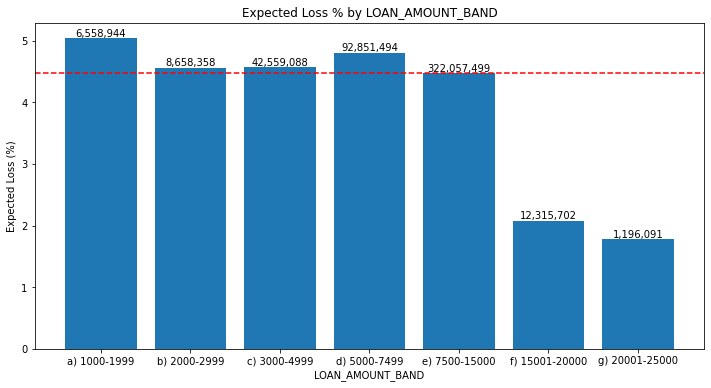

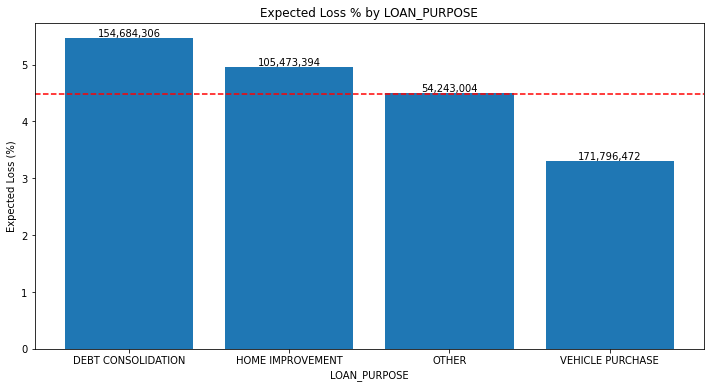

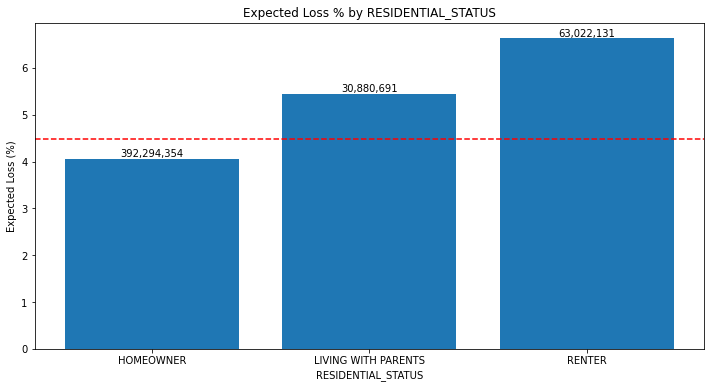

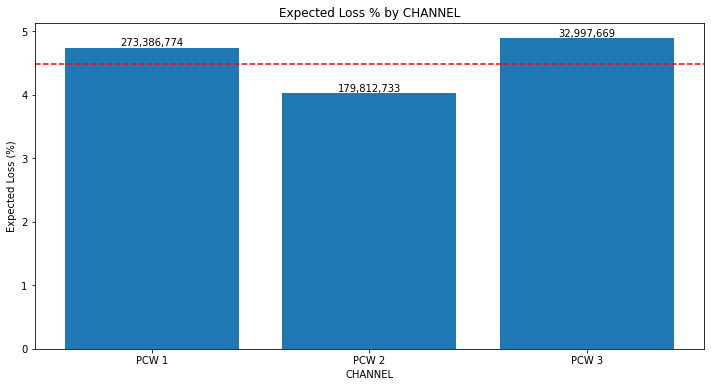

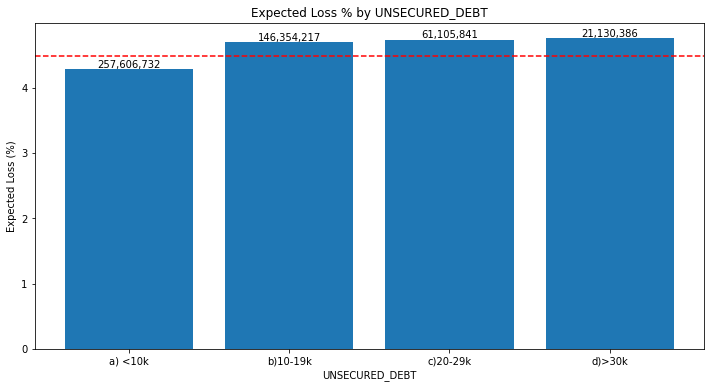

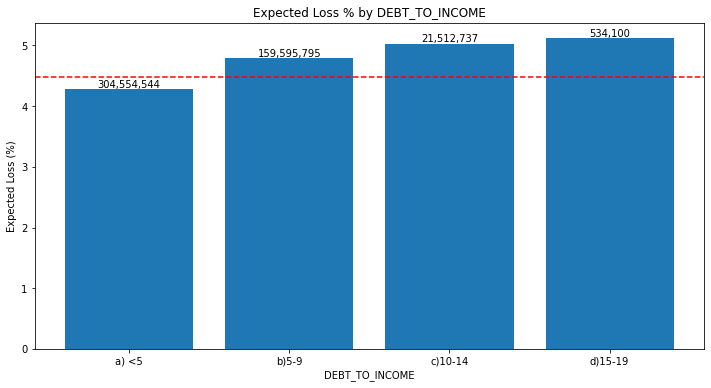

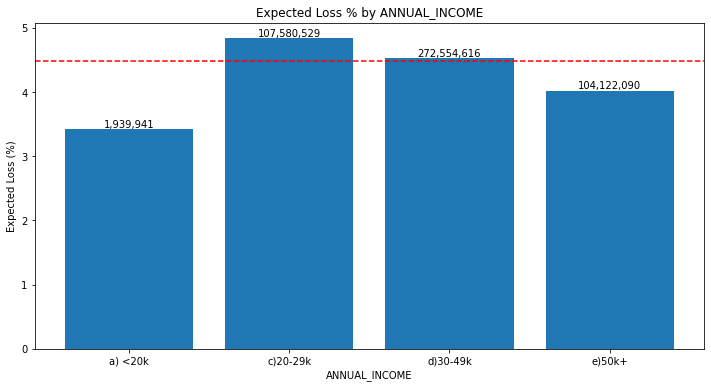

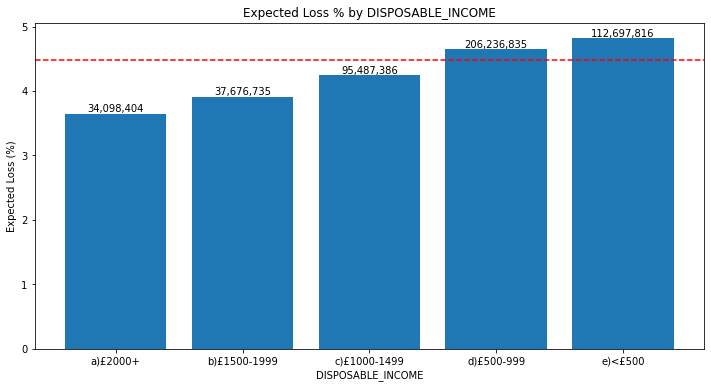

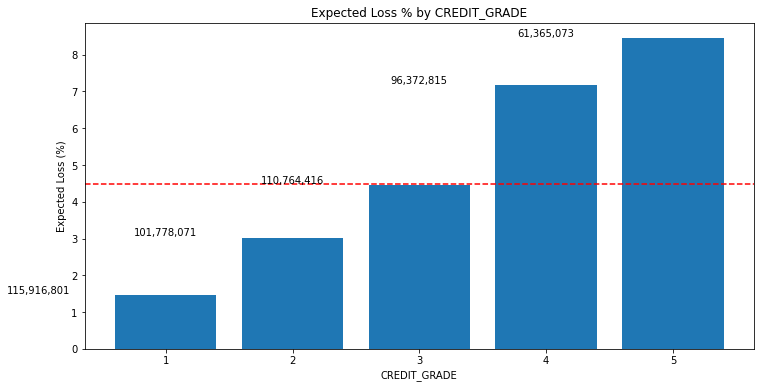

In [12]:
# Calculate the expected loss on paidout loans as expected_loss_total / LOANMOUNT
expected_losses = dict()
for col in ['LOAN_AMOUNT_BAND', 'LOAN_PURPOSE', 'RESIDENTIAL_STATUS', 'CHANNEL', 'UNSECURED_DEBT', 'DEBT_TO_INCOME', 'ANNUAL_INCOME', 'DISPOSABLE_INCOME', 'CREDIT_GRADE']:
    expected_losses[col] = (
        df_paidout.groupby(col).expected_loss_total.sum() / df_paidout.groupby(col).LOANMOUNT.sum(),
        df_paidout.groupby(col).LOANMOUNT.sum()
    )

# Find average expected loss without splits
average_expected_loss = df_paidout.expected_loss_total.sum() / df_paidout.LOANMOUNT.sum()
print(f'Average Expected Loss: {average_expected_loss:.2%}')

# Plot expected losses, with a dotted line at the average expected loss
for key, value in expected_losses.items():
    plt.figure(figsize=(12, 6))
    plt.bar(value[0].index, value[0].values*100)
    plt.title(f'Expected Loss % by {key}')
    plt.ylabel('Expected Loss (%)')
    plt.xlabel(key)
    for i, v in enumerate(value[0].values):
        plt.text(i, v*100, f'{value[1].values[i]:,}', ha='center', va='bottom')
    plt.axhline(y=average_expected_loss*100, color='r', linestyle='--')
    plt.show()

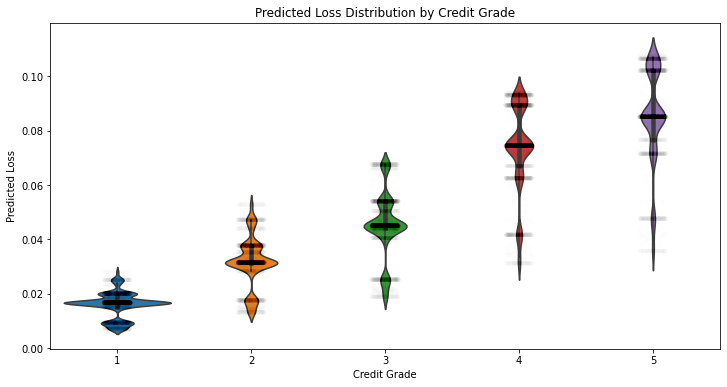

In [13]:
# Show distribution for each credit grade of the predicted loss for the paidout loans
plt.figure(figsize=(12, 6))
sns.violinplot(x='CREDIT_GRADE', y='PREDICTED_LOSS', data=df_paidout)
sns.stripplot(x='CREDIT_GRADE', y='PREDICTED_LOSS', data=df_paidout, color='k', alpha=0.005)
plt.title('Predicted Loss Distribution by Credit Grade')
plt.ylabel('Predicted Loss')
plt.xlabel('Credit Grade')
plt.show()

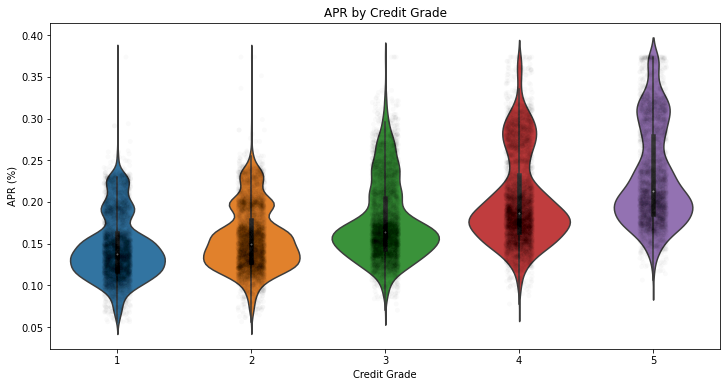

In [14]:
# Show distribution for each credit grade of the APR for the paidout loans
plt.figure(figsize=(12, 6))
sns.violinplot(x='CREDIT_GRADE', y='APR', data=df_paidout, scale='count')
sns.stripplot(x='CREDIT_GRADE', y='APR', data=df_paidout, color='k', alpha=0.02)
plt.title('APR by Credit Grade')
plt.ylabel('APR (%)')
plt.xlabel('Credit Grade')
plt.show()

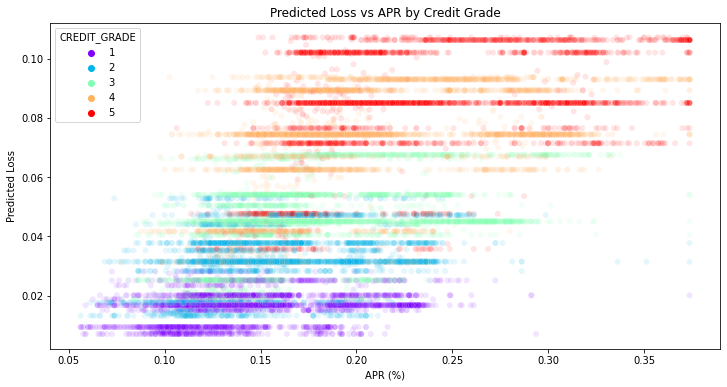

In [15]:
# Show predicted loss vs APR for each credit grade for the paidout loans
df_paidout['PREDICTED_LOSS_BAND'] = df_paidout.PREDICTED_LOSS.apply(lambda x: round(x, 2))
plt.figure(figsize=(12, 6))
sns.scatterplot(x='APR', y='PREDICTED_LOSS', hue='CREDIT_GRADE', data=df_paidout, palette='rainbow', alpha=0.1)
plt.title('Predicted Loss vs APR by Credit Grade')
plt.ylabel('Predicted Loss')
plt.xlabel('APR (%)')
plt.show()


We see that the credit grade is correlated to the predicted loss, presumably based on a scorecard. The loss is then linked to pricing. We could therefore use actual default rates to estimate the loss for pockets of loans with different attributes at application, to determine if this differs significantly from the predicted loss. In this way, we can find out if the scorecard is over- or underestimating the risk of certain groups of loans. This could also reveal opportunity for increasing or decreasing the interest rate or other production/risk strategies for certain groups of loans.

# Business Performance

## Conversion

In [16]:
df['quote_to_application'] = df['APPLICATION_VOLUME'] / df['QUOTE_REQUEST_VOLUME']
df['application_to_payout'] = df['PAIDOUT_VOLUME'] / df['APPLICATION_VOLUME']
df['quote_to_payout'] = df['PAIDOUT_VOLUME'] / df['QUOTE_REQUEST_VOLUME']

conversion_rates = df[['quote_to_application', 'application_to_payout', 'quote_to_payout']].mean()
conversion_rates

quote_to_application     0.109568
application_to_payout    0.393371
quote_to_payout          0.043101
dtype: float64

## Default Rate

In [17]:
# Default rate of paidout loans (by volume)
default_rate = df_paidout['DEFAULTED'].value_counts(normalize=True)
default_rate

N    0.919949
Y    0.080051
Name: DEFAULTED, dtype: float64

In [18]:
# Find loanmount sum by credit grade
loanmount_sum = df_paidout.groupby('CREDIT_GRADE').LOANMOUNT.sum()
# Find loanmount sum by credit grade where defaulted
defaulted_sum = df_paidout[df_paidout['DEFAULTED'] == 'Y'].groupby('CREDIT_GRADE').LOANMOUNT.sum()
# Calculate default rate
default_rate_credit_grade = defaulted_sum / loanmount_sum
# Include the total loanmount sum for each credit grade
loanmount_sum = loanmount_sum.apply(lambda x: f'{x:,}')
default_rate_credit_grade = pd.concat([default_rate_credit_grade, loanmount_sum], axis=1)
default_rate_credit_grade.columns = ['Default Rate', 'Total Loan Amount']
default_rate_credit_grade

,Default Rate,Total Loan Amount
CREDIT_GRADE,,
1,0.012951,"115,916,801"
2,0.018686,"101,778,071"
3,0.049663,"110,764,416"
4,0.051933,"96,372,815"
5,0.090468,"61,365,073"


In [19]:
# Find the average predicted loss for each credit grade, weighted by LOANMOUNT
average_predicted_loss = (df_paidout.groupby("CREDIT_GRADE").apply(lambda x: (x.PREDICTED_LOSS * x.LOANMOUNT).sum() / x.LOANMOUNT.sum())).sort_values()
print(average_predicted_loss)

CREDIT_GRADE
1    0.014551
2    0.030182
3    0.044503
4    0.071746
5    0.084476
dtype: float64


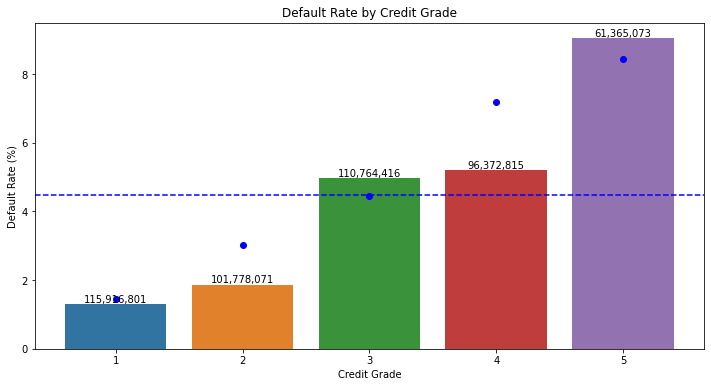

In [20]:
# Plot default rate by credit grade
plt.figure(figsize=(12, 6))
sns.barplot(x=default_rate_credit_grade.index, y=default_rate_credit_grade['Default Rate']*100)
plt.title('Default Rate by Credit Grade')
plt.ylabel('Default Rate (%)')
plt.xlabel('Credit Grade')
for i, v in enumerate(default_rate_credit_grade['Default Rate']):
    plt.text(i, v*100, f'{default_rate_credit_grade["Total Loan Amount"].values[i]}', ha='center', va='bottom')
plt.axhline(y=average_expected_loss*100, color='b', linestyle='--')
for i, v in enumerate(average_predicted_loss):
    plt.plot(i, v*100, 'bo')

In [21]:
loan_purpose_approval = df.groupby("LOAN_PURPOSE")["APPLICATION_DECISION"].value_counts(normalize=True).unstack()
print(loan_purpose_approval)

APPLICATION_DECISION  APPROVED  DECLINED  REFERRED
LOAN_PURPOSE                                      
DEBT CONSOLIDATION    0.280248  0.270432  0.449321
HOME IMPROVEMENT      0.288279  0.224335  0.487386
OTHER                 0.288233  0.244092  0.467675
VEHICLE PURCHASE      0.284383  0.242488  0.473130


In [22]:
dropoff_summary = df[['QUOTE_REQUEST_VOLUME', 'APPLICATION_VOLUME', 'PAIDOUT_VOLUME']].sum()

dropoff_summary['quote_to_application'] = dropoff_summary['APPLICATION_VOLUME'] / dropoff_summary['QUOTE_REQUEST_VOLUME']
dropoff_summary['application_to_payout'] = dropoff_summary['PAIDOUT_VOLUME'] / dropoff_summary['APPLICATION_VOLUME']
dropoff_summary['quote_to_payout'] = dropoff_summary['PAIDOUT_VOLUME'] / dropoff_summary['QUOTE_REQUEST_VOLUME']

dropoff_summary = dropoff_summary.apply(lambda x: f'{int(x):,}' if x > 1 else f'{x:.2%}')
print(dropoff_summary)

QUOTE_REQUEST_VOLUME     71,613,583
APPLICATION_VOLUME          120,127
PAIDOUT_VOLUME               52,331
quote_to_application          0.17%
application_to_payout        43.56%
quote_to_payout               0.07%
dtype: object


In [23]:
decline_reasons = df['APPLICATION_DECLINE_REASON'].value_counts()
print(decline_reasons)

CHANGED DETAILS        4020
INCOME VERIFICATION    2269
OTHER                  2109
FRAUD                  1632
MULTIPLE APPS           636
ID&V                    184
Name: APPLICATION_DECLINE_REASON, dtype: int64


# Optimisation

In [24]:
grouped = df_paidout.groupby([
    'LOAN_AMOUNT_BAND', 'LOAN_PURPOSE', 'RESIDENTIAL_STATUS',
    'UNSECURED_DEBT', 'DEBT_TO_INCOME', 'ANNUAL_INCOME', 'DISPOSABLE_INCOME'
])

agg_stats = []

for group, df_comb in tqdm(grouped, total=len(grouped)):
    if df_comb.empty:
        continue

    # Aggregate calculations
    application_value = df_comb['application_value'].sum()
    accepted_value = df_comb['LOANMOUNT'].sum()
    accepted_proportion_value = accepted_value / application_value
    average_loan_amount = accepted_value / df_comb['PAIDOUT_VOLUME'].sum()
    application_volume = df_comb['APPLICATION_VOLUME'].sum()
    accepted_volume = df_comb['PAIDOUT_VOLUME'].sum()
    accepted_proportion_volume = accepted_volume / application_volume
    predicted_loss = (df_comb['PREDICTED_LOSS'] * df_comb['LOANMOUNT']).sum() / accepted_value
    default_rate = df_comb[df_comb['DEFAULTED'] == 'Y']['LOANMOUNT'].sum() / accepted_value
    diff_default_predicted = default_rate - predicted_loss
    average_apr = (df_comb['APR'] * df_comb['LOANMOUNT']).sum() / accepted_value
    apr_above_default = average_apr - default_rate
    profitable = apr_above_default * average_loan_amount

    # Set threshold
    if accepted_volume < 150:
        continue

    # Store results
    agg_stats.append({
        'LOAN_AMOUNT_BAND': group[0],
        'LOAN_PURPOSE': group[1],
        'RESIDENTIAL_STATUS': group[2],
        'UNSECURED_DEBT': group[3],
        'DEBT_TO_INCOME': group[4],
        'ANNUAL_INCOME': group[5],
        'DISPOSABLE_INCOME': group[6],
        'application_value': application_value,
        'accepted_value': accepted_value,
        'accepted_proportion_value': accepted_proportion_value,
        'application_volume': application_volume,
        'accepted_volume': accepted_volume,
        'accepted_proportion_volume': accepted_proportion_volume,
        'predicted_loss': predicted_loss,
        'default_rate': default_rate,
        'diff_default_predicted': diff_default_predicted,
        'average_apr': average_apr,
        'average_loan_amount': average_loan_amount,
        'apr_above_default': apr_above_default,
        'profitable': profitable
    })
agg_stats = pd.DataFrame(agg_stats)

In [25]:
agg_stats.sort_values(['accepted_value', 'diff_default_predicted'], ascending=False).head()

,LOAN_AMOUNT_BAND,LOAN_PURPOSE,RESIDENTIAL_STATUS,UNSECURED_DEBT,DEBT_TO_INCOME,ANNUAL_INCOME,DISPOSABLE_INCOME,application_value,accepted_value,accepted_proportion_value,application_volume,accepted_volume,accepted_proportion_volume,predicted_loss,default_rate,diff_default_predicted,average_apr,average_loan_amount,apr_above_default,profitable
40,e) 7500-15000,DEBT CONSOLIDATION,HOMEOWNER,b)10-19k,b)5-9,d)30-49k,d)£500-999,606700849,14179108,0.023371,1234,836,0.677472,0.051588,0.047626,-0.003961,0.158201,16960.655502,0.110574,1875.411610
60,e) 7500-15000,VEHICLE PURCHASE,HOMEOWNER,a) <10k,a) <5,d)30-49k,d)£500-999,745688484,12695790,0.017026,1136,670,0.589789,0.018101,0.003151,-0.014950,0.110981,18948.940299,0.107831,2043.279744
41,e) 7500-15000,DEBT CONSOLIDATION,HOMEOWNER,b)10-19k,b)5-9,d)30-49k,e)<£500,332238274,9649382,0.029044,857,615,0.717620,0.051148,0.207548,0.156400,0.157772,15690.052033,-0.049776,-780.993978
49,e) 7500-15000,HOME IMPROVEMENT,HOMEOWNER,a) <10k,a) <5,d)30-49k,d)£500-999,257814648,9360479,0.036307,834,515,0.617506,0.048979,0.021527,-0.027452,0.137746,18175.687379,0.116219,2112.365944
59,e) 7500-15000,VEHICLE PURCHASE,HOMEOWNER,a) <10k,a) <5,d)30-49k,c)£1000-1499,384318124,8643133,0.022490,783,500,0.638570,0.016830,0.004397,-0.012433,0.110654,17286.266000,0.106258,1836.798293


In [26]:
# agg_stats[
#     (agg_stats['application_value'] > 10000000) &
#     ((agg_stats['diff_default_predicted'] > 0.03) | (agg_stats['diff_default_predicted'] < -0.03))
# ]

In [27]:
agg_stats['additional_loss'] = agg_stats['accepted_value'] * agg_stats['diff_default_predicted']
agg_stats['additional_loss'] = [int(x) for x in agg_stats['additional_loss']]

# Split into over and under predicted, with a threshold of 1%
df_over_predicted = agg_stats[agg_stats['diff_default_predicted'] < -0.01].copy()
df_under_predicted = agg_stats[agg_stats['diff_default_predicted'] > 0.01].copy()

df_over_predicted['opportunity_gain'] = df_over_predicted['application_value'] - df_over_predicted['accepted_value']

In [28]:
df_under_predicted.sort_values('additional_loss', ascending=False).head(4)

,LOAN_AMOUNT_BAND,LOAN_PURPOSE,RESIDENTIAL_STATUS,UNSECURED_DEBT,DEBT_TO_INCOME,ANNUAL_INCOME,DISPOSABLE_INCOME,application_value,accepted_value,accepted_proportion_value,application_volume,accepted_volume,accepted_proportion_volume,predicted_loss,default_rate,diff_default_predicted,average_apr,average_loan_amount,apr_above_default,profitable,additional_loss
41,e) 7500-15000,DEBT CONSOLIDATION,HOMEOWNER,b)10-19k,b)5-9,d)30-49k,e)<£500,332238274,9649382,0.029044,857,615,0.717620,0.051148,0.207548,0.156400,0.157772,15690.052033,-0.049776,-780.993978,1509162
38,e) 7500-15000,DEBT CONSOLIDATION,HOMEOWNER,b)10-19k,b)5-9,c)20-29k,e)<£500,175508490,6780997,0.038636,673,472,0.701337,0.051538,0.176021,0.124483,0.161763,14366.519068,-0.014258,-204.844301,844118
43,e) 7500-15000,DEBT CONSOLIDATION,HOMEOWNER,c)20-29k,b)5-9,d)30-49k,e)<£500,35323108,2516011,0.071228,224,183,0.816964,0.054213,0.193083,0.138870,0.162043,13748.693989,-0.031040,-426.763245,349398
53,e) 7500-15000,HOME IMPROVEMENT,HOMEOWNER,b)10-19k,b)5-9,d)30-49k,e)<£500,32890900,2621800,0.079712,249,202,0.811245,0.055589,0.149592,0.094002,0.143478,12979.207921,-0.006114,-79.357054,246455


In [29]:
df_under_predicted.sort_values('profitable', ascending=True).head(4)

,LOAN_AMOUNT_BAND,LOAN_PURPOSE,RESIDENTIAL_STATUS,UNSECURED_DEBT,DEBT_TO_INCOME,ANNUAL_INCOME,DISPOSABLE_INCOME,application_value,accepted_value,accepted_proportion_value,application_volume,accepted_volume,accepted_proportion_volume,predicted_loss,default_rate,diff_default_predicted,average_apr,average_loan_amount,apr_above_default,profitable,additional_loss
41,e) 7500-15000,DEBT CONSOLIDATION,HOMEOWNER,b)10-19k,b)5-9,d)30-49k,e)<£500,332238274,9649382,0.029044,857,615,0.717620,0.051148,0.207548,0.156400,0.157772,15690.052033,-0.049776,-780.993978,1509162
43,e) 7500-15000,DEBT CONSOLIDATION,HOMEOWNER,c)20-29k,b)5-9,d)30-49k,e)<£500,35323108,2516011,0.071228,224,183,0.816964,0.054213,0.193083,0.138870,0.162043,13748.693989,-0.031040,-426.763245,349398
38,e) 7500-15000,DEBT CONSOLIDATION,HOMEOWNER,b)10-19k,b)5-9,c)20-29k,e)<£500,175508490,6780997,0.038636,673,472,0.701337,0.051538,0.176021,0.124483,0.161763,14366.519068,-0.014258,-204.844301,844118
53,e) 7500-15000,HOME IMPROVEMENT,HOMEOWNER,b)10-19k,b)5-9,d)30-49k,e)<£500,32890900,2621800,0.079712,249,202,0.811245,0.055589,0.149592,0.094002,0.143478,12979.207921,-0.006114,-79.357054,246455


In [30]:
df_over_predicted.sort_values('opportunity_gain', ascending=False).head()

,LOAN_AMOUNT_BAND,LOAN_PURPOSE,RESIDENTIAL_STATUS,UNSECURED_DEBT,DEBT_TO_INCOME,ANNUAL_INCOME,DISPOSABLE_INCOME,application_value,accepted_value,accepted_proportion_value,application_volume,accepted_volume,accepted_proportion_volume,predicted_loss,default_rate,diff_default_predicted,average_apr,average_loan_amount,apr_above_default,profitable,additional_loss,opportunity_gain
60,e) 7500-15000,VEHICLE PURCHASE,HOMEOWNER,a) <10k,a) <5,d)30-49k,d)£500-999,745688484,12695790,0.017026,1136,670,0.589789,0.018101,0.003151,-0.014950,0.110981,18948.940299,0.107831,2043.279744,-189805,732992694
59,e) 7500-15000,VEHICLE PURCHASE,HOMEOWNER,a) <10k,a) <5,d)30-49k,c)£1000-1499,384318124,8643133,0.022490,783,500,0.638570,0.016830,0.004397,-0.012433,0.110654,17286.266000,0.106258,1836.798293,-107460,375674991
65,e) 7500-15000,VEHICLE PURCHASE,LIVING WITH PARENTS,a) <10k,a) <5,c)20-29k,d)£500-999,289982935,7539074,0.025998,777,468,0.602317,0.054141,0.013675,-0.040466,0.143839,16109.132479,0.130164,2096.827516,-305076,282443861
49,e) 7500-15000,HOME IMPROVEMENT,HOMEOWNER,a) <10k,a) <5,d)30-49k,d)£500-999,257814648,9360479,0.036307,834,515,0.617506,0.048979,0.021527,-0.027452,0.137746,18175.687379,0.116219,2112.365944,-256968,248454169
70,e) 7500-15000,VEHICLE PURCHASE,RENTER,a) <10k,a) <5,d)30-49k,d)£500-999,145144402,6382882,0.043976,633,382,0.603476,0.055752,0.033038,-0.022714,0.139465,16709.115183,0.106427,1778.302170,-144980,138761520


In [31]:
df_over_predicted.sort_values('additional_loss', ascending=True).head(4)

,LOAN_AMOUNT_BAND,LOAN_PURPOSE,RESIDENTIAL_STATUS,UNSECURED_DEBT,DEBT_TO_INCOME,ANNUAL_INCOME,DISPOSABLE_INCOME,application_value,accepted_value,accepted_proportion_value,application_volume,accepted_volume,accepted_proportion_volume,predicted_loss,default_rate,diff_default_predicted,average_apr,average_loan_amount,apr_above_default,profitable,additional_loss,opportunity_gain
65,e) 7500-15000,VEHICLE PURCHASE,LIVING WITH PARENTS,a) <10k,a) <5,c)20-29k,d)£500-999,289982935,7539074,0.025998,777,468,0.602317,0.054141,0.013675,-0.040466,0.143839,16109.132479,0.130164,2096.827516,-305076,282443861
49,e) 7500-15000,HOME IMPROVEMENT,HOMEOWNER,a) <10k,a) <5,d)30-49k,d)£500-999,257814648,9360479,0.036307,834,515,0.617506,0.048979,0.021527,-0.027452,0.137746,18175.687379,0.116219,2112.365944,-256968,248454169
66,e) 7500-15000,VEHICLE PURCHASE,LIVING WITH PARENTS,a) <10k,a) <5,d)30-49k,c)£1000-1499,82959755,4403769,0.053083,418,256,0.612440,0.050601,0.005450,-0.045151,0.139253,17202.222656,0.133803,2301.716743,-198833,78555986
60,e) 7500-15000,VEHICLE PURCHASE,HOMEOWNER,a) <10k,a) <5,d)30-49k,d)£500-999,745688484,12695790,0.017026,1136,670,0.589789,0.018101,0.003151,-0.014950,0.110981,18948.940299,0.107831,2043.279744,-189805,732992694


In [32]:
df_over_predicted.sort_values('profitable', ascending=False).head(5)

,LOAN_AMOUNT_BAND,LOAN_PURPOSE,RESIDENTIAL_STATUS,UNSECURED_DEBT,DEBT_TO_INCOME,ANNUAL_INCOME,DISPOSABLE_INCOME,application_value,accepted_value,accepted_proportion_value,application_volume,accepted_volume,accepted_proportion_volume,predicted_loss,default_rate,diff_default_predicted,average_apr,average_loan_amount,apr_above_default,profitable,additional_loss,opportunity_gain
51,e) 7500-15000,HOME IMPROVEMENT,HOMEOWNER,a) <10k,a) <5,e)50k+,a)£2000+,48898195,3930999,0.080391,343,179,0.521866,0.043183,0.011193,-0.031990,0.134262,21960.888268,0.123069,2702.713513,-125751,44967196
45,e) 7500-15000,DEBT CONSOLIDATION,RENTER,a) <10k,a) <5,d)30-49k,d)£500-999,46974110,3509570,0.074713,362,236,0.651934,0.073645,0.037327,-0.036319,0.195249,14871.059322,0.157923,2348.478655,-127463,43464540
66,e) 7500-15000,VEHICLE PURCHASE,LIVING WITH PARENTS,a) <10k,a) <5,d)30-49k,c)£1000-1499,82959755,4403769,0.053083,418,256,0.612440,0.050601,0.005450,-0.045151,0.139253,17202.222656,0.133803,2301.716743,-198833,78555986
62,e) 7500-15000,VEHICLE PURCHASE,HOMEOWNER,a) <10k,a) <5,e)50k+,a)£2000+,109749025,4309092,0.039263,378,208,0.550265,0.014575,0.002321,-0.012254,0.109104,20716.788462,0.106783,2212.201196,-52803,105439933
49,e) 7500-15000,HOME IMPROVEMENT,HOMEOWNER,a) <10k,a) <5,d)30-49k,d)£500-999,257814648,9360479,0.036307,834,515,0.617506,0.048979,0.021527,-0.027452,0.137746,18175.687379,0.116219,2112.365944,-256968,248454169


In [33]:
# Select best opportunities for over predicted
df_over_selected = df_over_predicted.loc[[49, 60, 65, 66]]
df_over_selected['pot'] = df_over_selected[['LOAN_PURPOSE', 'RESIDENTIAL_STATUS', 'ANNUAL_INCOME', 'DISPOSABLE_INCOME']].agg('\n'.join, axis=1)
df_over_selected['pot'] = df_over_selected['pot'].apply(lambda x: re.sub(r'[a-z]\)', '', x))

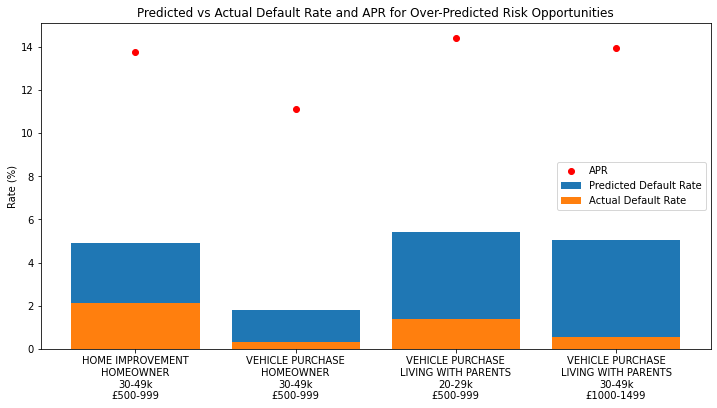

In [34]:
# plot a bar graph of predicted loss vs default rate for the selected rows
plt.figure(figsize=(12, 6))
plt.bar(df_over_selected['pot'], df_over_selected['predicted_loss']*100, label='Predicted Default Rate')
plt.bar(df_over_selected['pot'], df_over_selected['default_rate']*100, label='Actual Default Rate')
plt.scatter(df_over_selected['pot'], df_over_selected['average_apr']*100, color='r', label='APR')
plt.title('Predicted vs Actual Default Rate and APR for Over-Predicted Risk Opportunities')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()

In [37]:
# Find average difference between actual default rate and APR
agg_stats['diff_default_apr'] = agg_stats['average_apr'] - agg_stats['default_rate']
agg_stats['diff_default_apr'].mean()

0.11236669840135816

In [36]:
# Find average difference between predicted default rate and APR
agg_stats['diff_default_apr_predicted'] = agg_stats['average_apr'] - agg_stats['predicted_loss']
agg_stats['diff_default_apr_predicted'].mean()

0.10793521536758639